In [9]:
import random
import math
from matplotlib import pyplot as plt
from collections import Counter
# Теория вероятностей

def random_kid():
    """
    рандомно возвращает мальчика или девочку
    """
    return random.choice(['boy', 'girl'])

# проверка парадокса мальчика и девочки
both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

# эксперимент в совокупности из 100000 семей
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == 'girl':
        older_girl += 1
    if older == 'girl' and younger == 'girl':
        both_girls += 1
    if older == 'girl' or younger == 'girl':
        either_girl += 1
    
print(f'P(обе | старшая): {both_girls / older_girl}')
print(f'P(обе | любая): {both_girls / either_girl}')

P(обе | старшая): 0.5007089325501317
P(обе | любая): 0.3311897106109325


In [10]:
# теорема Байеса - лучший друг аналитика данных

In [11]:
# Непрерывные распределения
# функция плотности
def uniform_pdf(x):
    """
    Функция плотности равномерного распределения
    """
    return 1 if x >= 0 and x < 1 else 0


def uniform_pdf(x):
    """
    Возвращает вероятность того, что равномерно распределенная случайная величиня <= x
    """
    if x < 0:
        # величина никогда не бывает меньше 0 
        return 0
    elif x < 1:
        # например, P(X <= 0.4) = 0.4
        return x
    else:
        # величина всегда меньше 1
        return 1

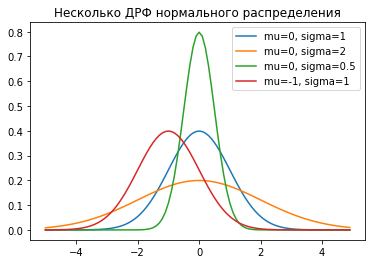

In [12]:
# Нормальное распределение
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

xs = [x / 10 for x in range(-50, 50)]
# при mu=0 и sigma=1 - стандартное нормальное распределение
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '-', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], '-', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-', label='mu=-1, sigma=1')
plt.legend()
plt.title('Несколько ДРФ нормального распределения')
plt.show()

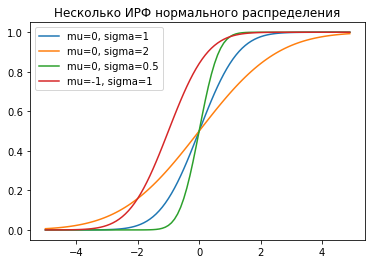

In [13]:
# Интегральная функция нормального распределения
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

xs = [x / 10 for x in range(-50, 50)]
# при mu=0 и sigma=1 - стандартное нормальное распределение
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '-', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], '-', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-', label='mu=-1, sigma=1')
plt.legend()
plt.title('Несколько ИРФ нормального распределения')
plt.show()

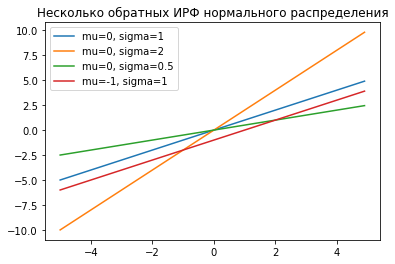

In [14]:
# Обратная ИРФ нормального распределения
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """
    Найти приближенную инверсию, используя двоичный поиск
    """
    # если не стандартизированно, то стандартизировать и прошкалировать
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10, 0
    hi_z, hi_p = 10, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = (low_z + hi_z) / 2
        if mid_p < p:
            #значение середины все еще слишком низкое, искать выше
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            #значение середины все еще слишком высокое - искать ниже
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    
    return mid_z


xs = [x / 10 for x in range(-50, 50)]

plt.plot(xs, [inverse_normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [inverse_normal_cdf(x, sigma=2) for x in xs], '-', label='mu=0, sigma=2')
plt.plot(xs, [inverse_normal_cdf(x, sigma=0.5) for x in xs], '-', label='mu=0, sigma=0.5')
plt.plot(xs, [inverse_normal_cdf(x, mu=-1) for x in xs], '-', label='mu=-1, sigma=1')
plt.legend()
plt.title('Несколько обратных ИРФ нормального распределения')
plt.show()

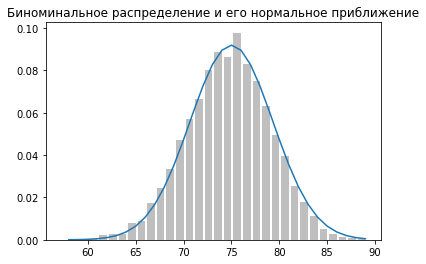

In [17]:
# Центральная предельная теорема


def bernoulli_trial(p):
    # Независимое испытание Бернулли
    return 1 if random.random() < p else 0


def binominal(n, p):
    # Биноминальное распределение    
    return sum(bernoulli_trial(p) for _ in range(n))


def make_hist(p, n, num_points):
    # построить гистограмму    
    data = [binominal(n, p) for _ in range(num_points)]


    # столбчатая диаграмма, показывающая фактические биноминальные выборки
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
           [v / num_points for v in histogram.values()],
           0.8,
           color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))


    # линейный график, показывающий нормальное приближение
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title('Биноминальное распределение и его нормальное приближение')
    plt.show()

make_hist(0.75, 100, 10000)